In [7]:
import numpy as np, pandas as pd, glob, os.path, re
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#Чиатем данные и смотрим на них

In [8]:
df=pd.DataFrame()
for file in glob.iglob('pydata-book-2nd-edition/datasets/babynames/*.txt'):
    year_df=pd.read_table(file,sep=',',names=['Name','Sex','Count'])
    year_df['Year']=int(re.search('[0-9]+',os.path.basename(file)).group())
    df=pd.concat([df, year_df])

In [9]:
df.head()

,Name,Sex,Count,Year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [10]:
df.tail()

,Name,Sex,Count,Year
33833,Zymaire,M,5,2010
33834,Zyonne,M,5,2010
33835,Zyquarius,M,5,2010
33836,Zyran,M,5,2010
33837,Zzyzx,M,5,2010


# Задание 1

In [11]:
pt=pd.pivot_table(df, values='Count', index=['Year'], columns=['Sex'], aggfunc='sum')
pt.head()

Sex,F,M
Year,,
1880,90993,110493
1881,91955,100748
1882,107851,113687
1883,112322,104632
1884,129021,114445


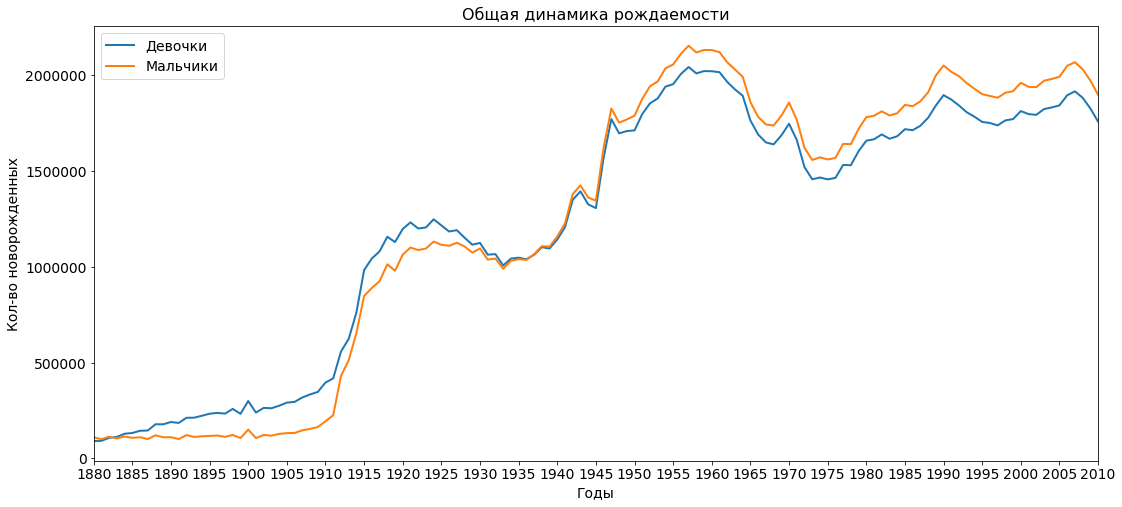

In [12]:
ax=pt.plot(kind='line', linewidth=2, figsize=(18,8), fontsize=14, xticks=range(1880,2011,5))
ax.set_xlabel('Годы', fontsize = 14 ); ax.set_ylabel('Кол-во новорожденных', fontsize = 14);  
ax.legend(['Девочки','Мальчики'], fontsize=14);
ax.set_title('Общая динамика рождаемости', fontsize = 16);

# Задание 2

In [9]:
popularity=df.groupby(['Name'])['Count'].sum()

In [10]:
popularity.sort_values(ascending=False)[:10]

Name
James      5072771
John       5061897
Robert     4788050
Michael    4265373
Mary       4119074
William    4002392
David      3538748
Richard    2552269
Joseph     2529809
Charles    2347703
Name: Count, dtype: int64

# Задание 3

In [58]:
F=df.groupby(by=['Sex','Year','Name']).sum().loc['F']
M=df.groupby(by=['Sex','Year','Name']).sum().loc['M']

In [ ]:
# Этот кусок кода считается очень долго

In [60]:
begin = 1880
end = 2010
interval = int((end+1-begin)/10)
most_freq = list()
low=begin
for i in range(1,11):
    heigh = low + interval
    all_names_f = dict()
    all_names_m = dict()    
    for year in range (low, heigh):
        sorted_year_f = F.loc[year].sort_values(by=['Count'], ascending=False)
        sorted_year_m = M.loc[year].sort_values(by=['Count'], ascending=False)
        for i in range(0,sorted_year_f.shape[0]):
            name = sorted_year_f.index.get_level_values('Name')[i]
            all_names_f[name] = all_names_f.get(name, 0) + sorted_year_f.values[i][0]              
        for i in range(0,sorted_year_m.shape[0]):
            name = sorted_year_m.index.get_level_values('Name')[i]
            all_names_m[name] = all_names_m.get(name, 0) + sorted_year_m.values[i][0] 
            
    freq_name_f = [key for key, value in all_names_f.items() if value == max(all_names_f.values())]
    freq_name_m = [key for key, value in all_names_m.items() if value == max(all_names_m.values())]    
    #    most_freq_f.append(([low, heigh],list(all_names_f.items())[0][0]))
    most_freq.append(([low, heigh], freq_name_f[0], freq_name_m[0]))
    low = low + interval
print(most_freq)

KeyboardInterrupt: 

In [ ]:
# Так как предыдущий кусок кода считается очень долго, было принято решение записать результаты в файл ....

In [30]:
with open('most_freq_name.txt','w') as file:
    for el in most_freq:
        file.write(str(el[0][0]) + ';' + str(el[0][1]) + ';' + el[1] + ';' + el[2] + '\n')

In [ ]:
# ... и потом их из файла считывать

In [44]:
mf = list()
with open('most_freq_name.txt') as file:
    for line in file.readlines():
        arr = line[:-1].split(';')
        mf.append(([arr[0], arr[1]], arr[2], arr[3]))
mf

[(['1880', '1893'], 'Mary', 'John'),
 (['1893', '1906'], 'Mary', 'John'),
 (['1906', '1919'], 'Mary', 'John'),
 (['1919', '1932'], 'Mary', 'Robert'),
 (['1932', '1945'], 'Mary', 'Robert'),
 (['1945', '1958'], 'Linda', 'James'),
 (['1958', '1971'], 'Lisa', 'Michael'),
 (['1971', '1984'], 'Jennifer', 'Michael'),
 (['1984', '1997'], 'Jessica', 'Michael'),
 (['1997', '2010'], 'Emily', 'Jacob')]

In [73]:
F_byYear = df.groupby(by=['Sex','Name','Year']).sum().loc['F']
M_byYear = df.groupby(by=['Sex','Name','Year']).sum().loc['M']
F_byYear.loc['Mary'].head()    

,Count
Year,
1880,7065
1881,6919
1882,8149
1883,8012
1884,9217


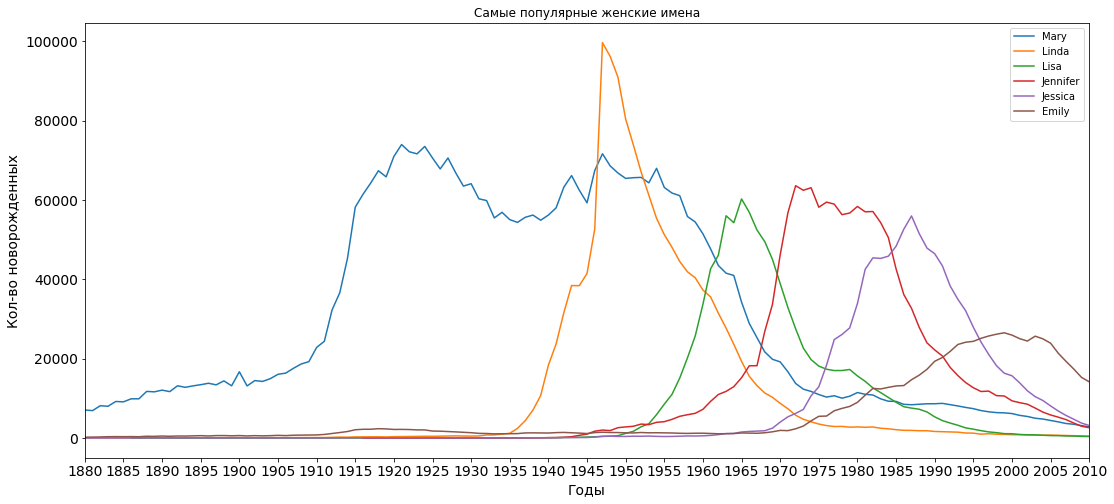

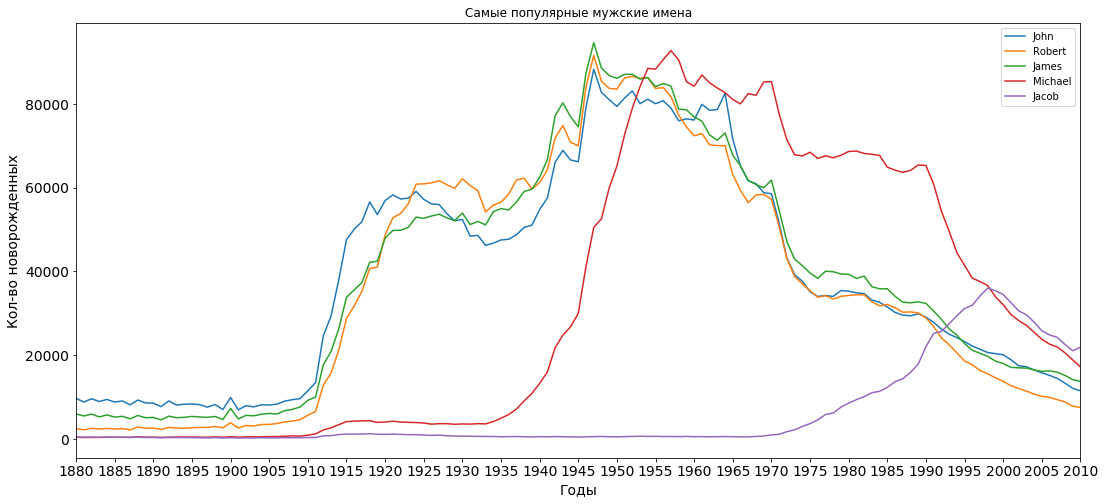

In [101]:
curr_f_name, curr_m_name = '', ''
legend_f = list()
legend_m = list()
for i in range(0,len(mf)):
    if mf[i][1] != curr_f_name: 
        curr_f_name = mf[i][1]
        if i == 0: ax_f = F_byYear.loc[curr_f_name].plot(title='Самые популярные женские имена', \
                                                         figsize=(18,8), fontsize=14, xticks=range(1880,2011,5))
        else: F_byYear.loc[curr_f_name].plot(ax = ax_f)
        legend_f.append(curr_f_name)
    if mf[i][2] != curr_m_name: 
        curr_m_name = mf[i][2]
        if i == 0: ax_m = M_byYear.loc[curr_m_name].plot(title='Самые популярные мужские имена', \
                                                         figsize=(18,8), fontsize=14, xticks=range(1880,2011,5))
        else: M_byYear.loc[curr_m_name].plot(ax = ax_m)
        legend_m.append(curr_m_name)
ax_f.legend(legend_f)
ax_f.set_xlabel('Годы', fontsize = 14 ); ax_f.set_ylabel('Кол-во новорожденных', fontsize = 14);  
ax_m.legend(legend_m)
ax_m.set_xlabel('Годы', fontsize = 14 ); ax_m.set_ylabel('Кол-во новорожденных', fontsize = 14); 

#df.plot(legend=)

# Задание 4

In [206]:
proc_by_year = list()
begin = 1880
end = 2010
for year in range(begin, end + 1):
    sum_by_name = df.groupby(['Year','Name']).sum().loc[year].sort_values(['Count'], ascending=False)    
    sum_by_year = df.groupby(['Year']).sum().loc[year]
    count = 0
    names_list = list()
    for name_ in sum_by_name.index.get_level_values('Name'):
        count = count + sum_by_name.loc[name_][0]
        if count >= sum_by_year[0] / 2:        
            names_list.append((name_, sum_by_name.loc[name_][0], count))
            break;
        else:         
            names_list.append((name_, sum_by_name.loc[name_][0], count))
    proc_by_year.append({'Year': year, '50proc': len(names_list), 'All': sum_by_name.shape[0]})
df1=pd.DataFrame(proc_by_year)

In [207]:
df1.head()

,50proc,All,Year
0,45,1889,1880
1,47,1830,1881
2,49,2012,1882
3,51,1962,1883
4,53,2158,1884


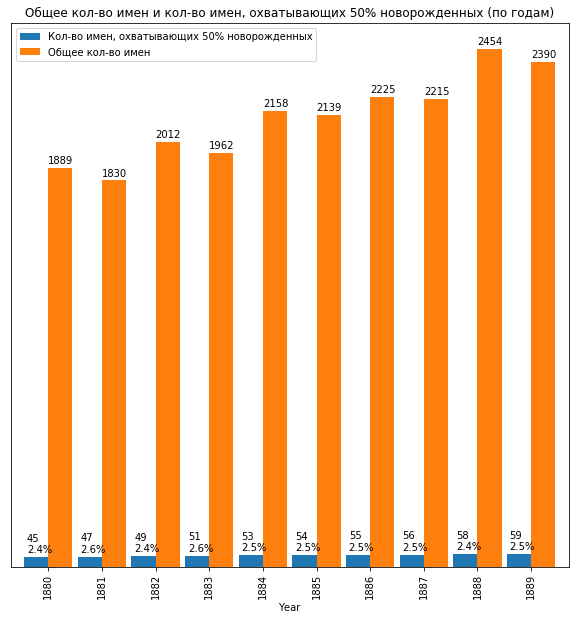

In [233]:
df2 = df1[:10]
fig, ax1= plt.subplots(1, 1)
fig.set_size_inches(10,10)
df2.plot.bar(x = 'Year', ax = ax1, title = 'Общее кол-во имен и кол-во имен, охватывающих 50% новорожденных (по годам)', width = .9)
ax1.legend(['Кол-во имен, охватывающих 50% новорожденных', 'Общее кол-во имен'])
for i, v in enumerate(df2['All']): ax1.text(i, v + 20, str(v))
for i, v in enumerate(df2['50proc']): ax1.text(i - .4, v + 20, str(v) + '\n' + str(round(v*100/df2['All'][i], 1)) + '%')
ax1.axes.get_yaxis().set_visible(False)

# Задание 5

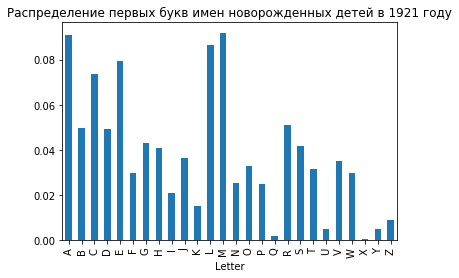

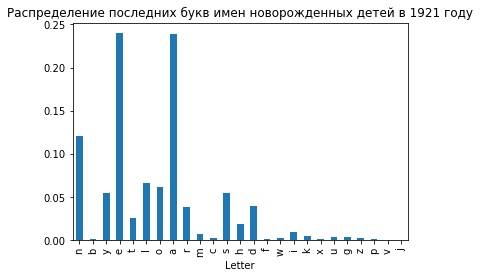

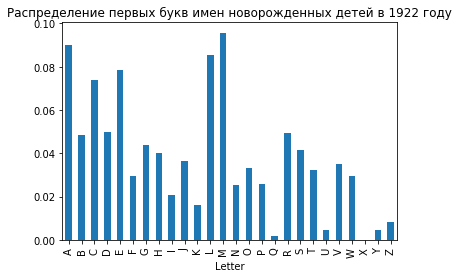

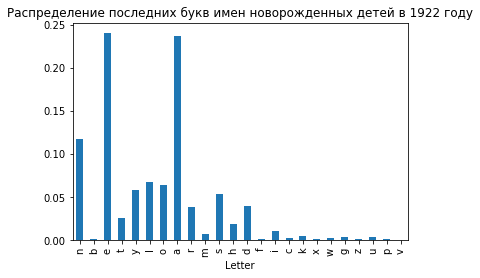

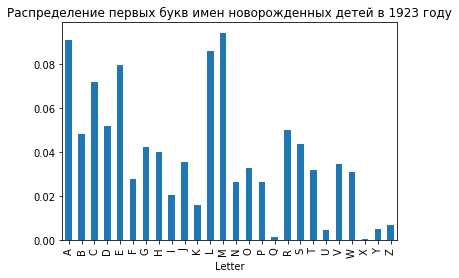

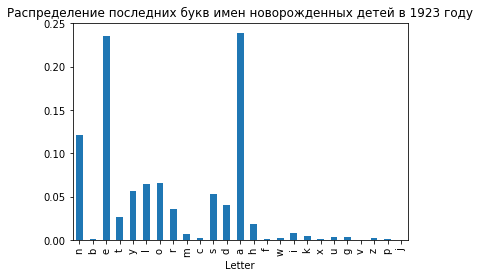

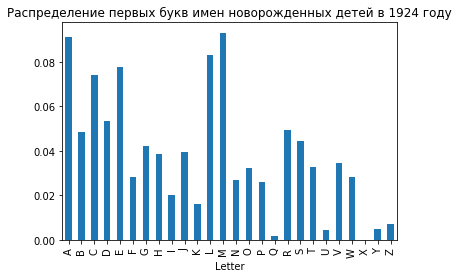

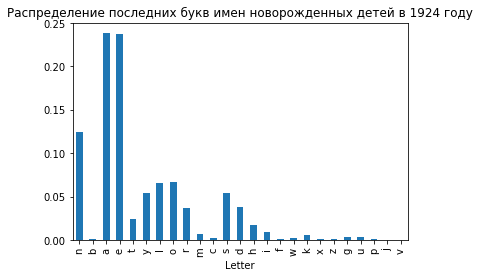

In [337]:
begin = 1880
end = 2010
start = np.random.randint(begin, end - 4)
for year in range(start, start + 4):
    stat_first_letter = dict()
    stat_last_letter = dict()
    list_first_letter = list()
    list_last_letter = list()    
    df_by_name = df.groupby(['Year','Name']).size().loc[year]  
    for name_ in df_by_name.index.get_level_values('Name'):
        stat_first_letter[name_[0]] = stat_first_letter.get(name_[0], 0) + 1
        stat_last_letter[name_[-1:]] = stat_last_letter.get(name_[-1:], 0) + 1      
    for k, v in stat_first_letter.items():
        list_first_letter.append({'Letter': k, 'Count': v})       
    for k, v in stat_last_letter.items():
        list_last_letter.append({'Letter': k, 'Count': v}) 
    df3 = pd.DataFrame(list_first_letter)
    df4 = pd.DataFrame(list_last_letter)
    df3_norm = df3.copy(); df4_norm = df4.copy()
    total = df3_norm['Count'].sum()
    df3_norm['Count'] = df3['Count'].apply(lambda x: x/total)
    total = df4_norm['Count'].sum()
    df4_norm['Count'] = df4['Count'].apply(lambda x: x/total)    
    df3_norm.plot.bar(x = 'Letter', title = 'Распределение первых букв имен новорожденных детей в {} году'.format(year), legend = False)
    df4_norm.plot.bar(x = 'Letter', title = 'Распределение последних букв имен новорожденных детей в {} году'.format(year), legend = False)

# Задание 6
Примеры для ввода: 
Elvis; 1954,1977; 1977 - Элвис Пресли
Marilyn; 1950,1960; 1962 - Мэрлин Монро
Theodore; 1901,1906; 1919 - Теодор Рузвельт
Tom; 1990,2010; - - Том Круз
Oprah; 1986,2010; - - Опра Унфри
Shaquille; 1996,2010; - - Шакил О'Нил
Johnny; 1990,2010; - Джонни Депп 
Madonna; 1982,2010; - Мадонна
Barack; 2009,2010; - Барак Обама

Введите имя: Elvis
Введите годы, когда данный персонаж получил известность (через запятую): 1954,1977
Введите год, когда персонаж умер: 1977


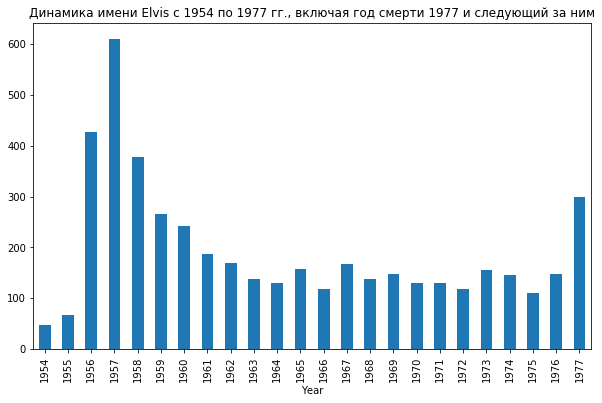

In [6]:
name_ = input('Введите имя: ')
a = input('Введите годы, когда данный персонаж получил известность (через запятую): ')
years = [int(el.strip()) for el in a.split(',')]
a = input('Введите год, когда персонаж умер: ')
try:
    death_year = int(a)
except:
    death_year = 0

df5 = df.groupby(['Year','Name']).sum()
stat_by_name = list()
for year in range(years[0], years[1] + 1):
    try:
        stat_by_name.append({'Year': year, 'Count': df5.loc[year].loc[name_][0]})
    except KeyError:
        pass
    
if death_year > years[1]:
    for year in range(death_year, death_year + 2):
        try:
            stat_by_name.append({'Year': year, 'Count': df5.loc[year].loc[name_][0]})
        except KeyError:
            pass    
df6 = pd.DataFrame(stat_by_name)

df6.plot.bar(x = 'Year', figsize = (10,6), legend = False, \
             title = 'Динамика имени {} с {} по {} гг., включая год смерти {} и следующий за ним'.format(name_, years[0], years[1], death_year))